In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [ ]:
### **Auctions**

In [5]:
auctions = pd.read_csv('data/auctions.csv.gzip', compression = 'gzip')

In [6]:
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [7]:
auctions['device_id'].value_counts().head(5)

633139769114048761     27762
7202276635029175071    23055
7298861376107043945    18188
6302840482782120473    16400
5376802567578262905    16367
Name: device_id, dtype: int64

In [8]:
#Quiero tener algun tipo de indice para no hardcodear los valores de los id's
top5 = auctions.groupby('device_id').agg({'device_id': 'count'})

In [9]:
top5.columns = ['count']

In [10]:
top5 = top5.sort_values('count', ascending = False).head(5)

In [11]:
top5.reset_index(inplace = True)

In [12]:
top5

,device_id,count
0,633139769114048761,27762
1,7202276635029175071,23055
2,7298861376107043945,18188
3,6302840482782120473,16400
4,5376802567578262905,16367


In [13]:
auctions['date'] = pd.to_datetime(auctions['date'])

In [14]:
auctions['day'] = auctions['date'].dt.day

In [15]:
auctions_graficable = auctions.loc[(auctions['device_id'] == top5.loc[0,'device_id']) | (auctions['device_id'] == top5.loc[1,'device_id']) | \
             (auctions['device_id'] == top5.loc[2,'device_id']) | (auctions['device_id'] == top5.loc[3,'device_id']) | \
             (auctions['device_id'] == top5.loc[4,'device_id']) ]\
        .groupby('day').agg({'day' : 'count'})

In [16]:
auctions_graficable.columns = ['count']

In [17]:
auctions_graficable.reset_index(inplace = True)

In [ ]:
auctions_graficable.head()

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


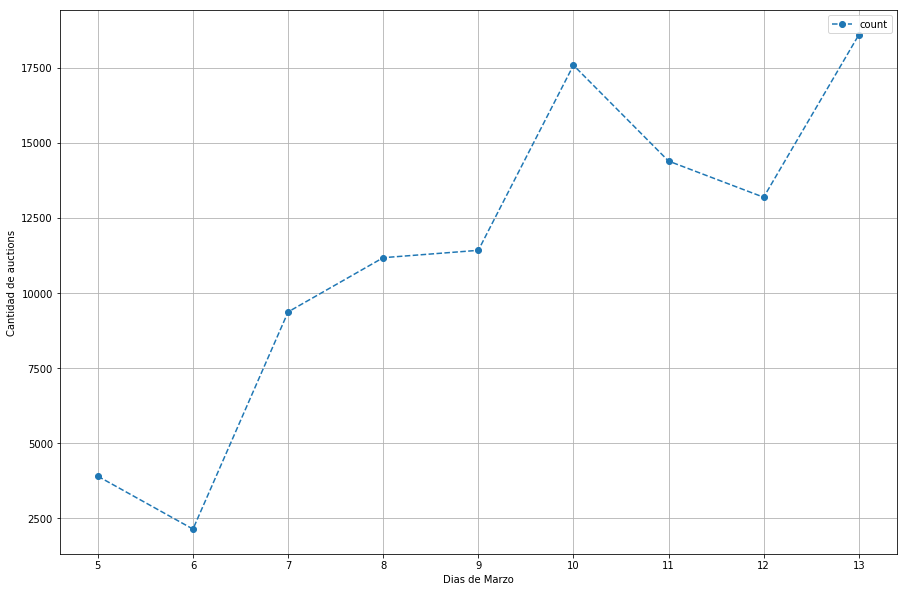

In [18]:
grph1 = auctions_graficable.plot.line('day', 'count', grid = 'on', figsize = (15,10), style = 'o--')
grph1.set_xlabel('Dias de Marzo')
grph1.set_ylabel('Cantidad de auctions');

In [ ]:
## El que sigue es un grafico de la cantidad de auctions para cada tipo de source que hay

In [27]:
auctions['source_id'].value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64

In [31]:
auctions_source = auctions.groupby('source_id').agg({'source_id' : 'count'})

In [36]:
auctions_source.columns = ['count']

In [38]:
auctions_source.reset_index(inplace = True)

In [49]:
auctions_source = auctions_source.sort_values('count', ascending = False)

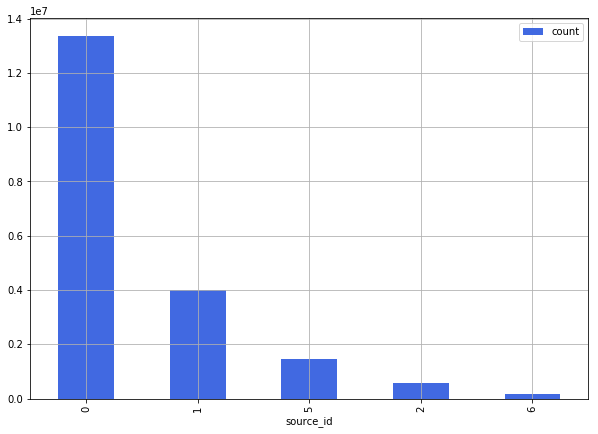

In [55]:
grph3 = auctions_source.plot.bar('source_id', 'count', grid = True, figsize = (10,7), color = 'royalblue')
grph3.set_xlabel = 'Source ID'
grph3.set_ylabel = 'Cantidad de auctions'

In [22]:
### **Clicks**

In [153]:
clicks = pd.read_csv('/Users/lucasrialbrandariz/Documents/Organizacion de Datos/Tp1/Csv fuente/clicks.csv')

In [167]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [168]:
clicks['created'] = pd.to_datetime(clicks['created'])

In [169]:
clicks['hour'] = clicks['created'].dt.hour

In [171]:
clicks_graficable = clicks.groupby('hour').agg({ 'hour' :'count'})

In [175]:
clicks_graficable.columns = ['count']

In [176]:
clicks_graficable.reset_index()

,hour,count
0,0,440
1,1,4209
2,2,2327
3,3,754
4,4,1079
5,5,945
6,6,678
7,7,518
8,8,537
9,9,754


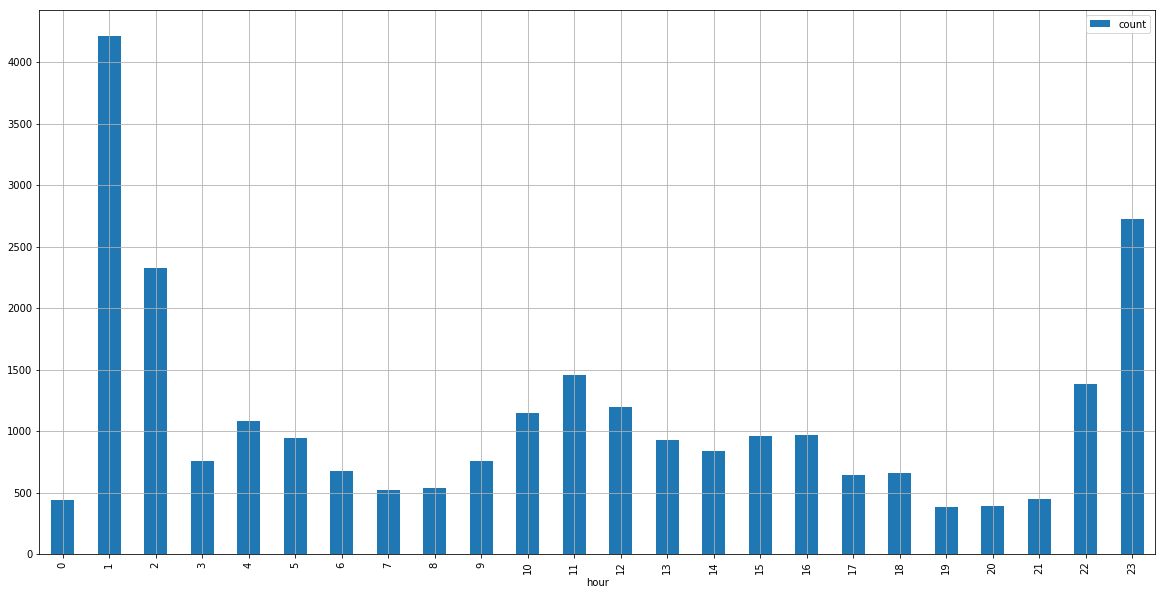

In [184]:
grph2 = clicks_graficable.plot.bar(grid = True, figsize = (20,10))
grph2.set_xlabel = 'Hours'
grph2.set_ylabel = 'Cantidad de clicks'